In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
sep = os.sep

In [2]:
os.chdir('/home/ak/PycharmProjects/ature') 

In [3]:
train_val = pd.read_csv('net_logs'+sep+'drive.PATCHNET_UNWEIGHTED.chk.tar.csv', index_col='TYPE')
val = train_val.query('TYPE==1')
T_val = np.arange(val.shape[0])
train = train_val.query('TYPE==0')
T_train =np.arange(train.shape[0])
test= pd.read_csv('net_logs'+sep+'drive.PATCHNET_UNWEIGHTED.chk.tar.csv', index_col='TYPE')
T_test = np.arange(test.shape[0])

/home/ak/anaconda3/envs/ature_env/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/ak/anaconda3/envs/ature_env/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
train_val1 = pd.read_csv('net_logs'+sep+'unet-drive.UNWEIGHTED.chk.tar.csv', index_col='TYPE')
val1 = train_val1.query('TYPE==1')
T_val1 = np.arange(val1.shape[0])
train1 = train_val1.query('TYPE==0')
T_train1 =np.arange(train1.shape[0])
test1= pd.read_csv('net_logs'+sep+'unet-drive.UNWEIGHTED.chk.tar-TEST.csv', index_col='TYPE')
T_test1 = np.arange(test1.shape[0])

### Validation Precision-Recall

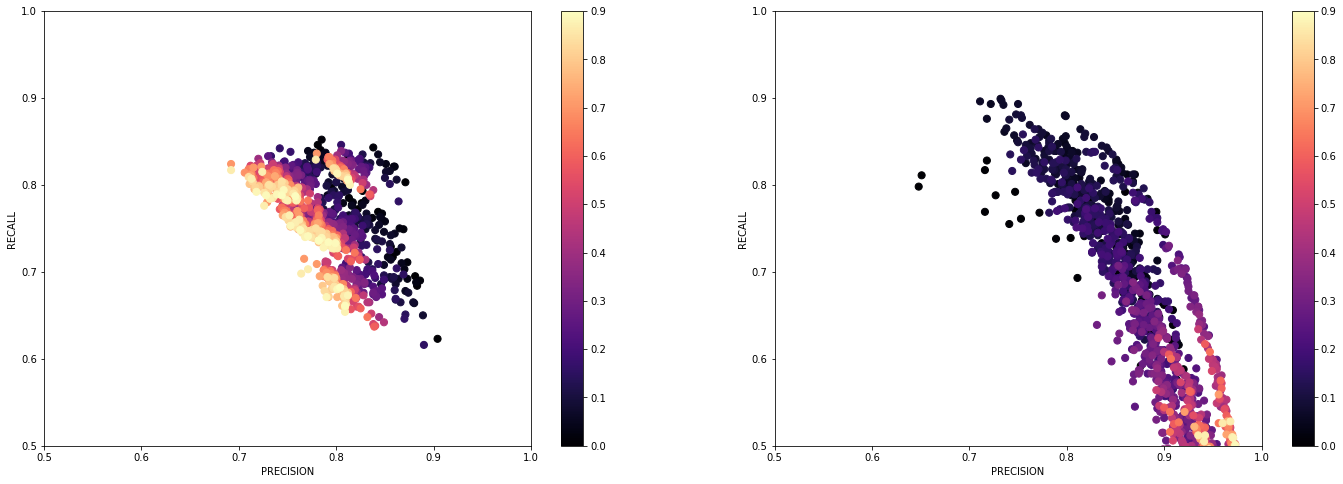

In [5]:
plt.rcParams["figure.figsize"] = [24,8]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
z = np.linspace(0,0.9, val['PRECISION'].shape[0])
z1 = np.linspace(0,0.9, val1['PRECISION'].shape[0])
plots = val.plot.scatter(x='PRECISION', y='RECALL', c=z, colormap='magma', ax=ax1, s=50, xlim=(0.5,1), ylim=(0.5,1))
plots = val1.plot.scatter(x='PRECISION', y='RECALL', c=z1, colormap='magma', ax=ax2, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plt.show()

### Validation F1 Score

In [ ]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = val.copy(), val1.copy()
df['F1'] = savgol_filter(df['F1'], 51, 3)
df1['F1'] = savgol_filter(df1['F1'], 51, 3)
plots = val.plot(y='F1', x=T_val, c='#cccccc', ax=ax1)
plots = df.plot(y='F1', x=T_val, c='#222222', ax=ax1)
plots = val1.plot(y='F1', x=T_val1, c='#cccccc', ax=ax2)
plots = df1.plot(y='F1', x=T_val1, c='#222222', ax=ax2)
plt.show()

### Validation Accuracy

In [ ]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = val.copy(), val1.copy()
df['ACCURACY'] = savgol_filter(df['ACCURACY'], 51, 3)
df1['ACCURACY'] = savgol_filter(df1['ACCURACY'], 51, 3)
plots = val.plot(y='ACCURACY', x=T_val, c='#cccccc', ax=ax1)
plots = df.plot(y='ACCURACY', x=T_val, c='#222222', ax=ax1)
plots = val1.plot(y='ACCURACY', x=T_val1, c='#cccccc', ax=ax2)
plots = df1.plot(y='ACCURACY', x=T_val1, c='#222222', ax=ax2)
plt.show()

### Training F1 Score

In [ ]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['F1'] = savgol_filter(df['F1'], 91, 2)
df1['F1'] = savgol_filter(df1['F1'], 91, 2)
plots = train.plot(y='F1', x=T_train, c='#cccccc', ax=ax1)
plots = df.plot(y='F1', x=T_train, c='#222222', ax=ax1)
plots = train1.plot(y='F1', x=T_train1, c='#cccccc', ax=ax2)
plots = df1.plot(y='F1', x=T_train1, c='#222222', ax=ax2)
plt.show()

### Training precision-recall

In [ ]:
plt.rcParams["figure.figsize"] = [24,6]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
z = np.linspace(0,0.9, train['PRECISION'].shape[0])
z1 = np.linspace(0,0.9, train1['PRECISION'].shape[0])
plots = train.plot.scatter(x='PRECISION', y='RECALL', c=z, colormap='magma', ax=ax1, s=50, xlim=(0.5,1), ylim=(0.5,1))
plots = train1.plot.scatter(x='PRECISION', y='RECALL', c=z1, colormap='magma', ax=ax2, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plt.show()

### Training loss

In [ ]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['LOSS'] = savgol_filter(df['LOSS'], 51, 3)
df1['LOSS'] = savgol_filter(df1['LOSS'], 51, 3)
plots = train.plot(y='LOSS', x=T_train, c='#cccccc', ax=ax1)
plots = df.plot(y='LOSS', x=T_train, c='#222222', ax=ax1)
plots = train1.plot(y='LOSS', x=T_train1, c='#cccccc', ax=ax2)
plots = df1.plot(y='LOSS', x=T_train1, c='#222222', ax=ax2)
plt.show()

### Training Accuracy

In [ ]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['ACCURACY'] = savgol_filter(df['ACCURACY'], 51, 3)
df1['ACCURACY'] = savgol_filter(df1['ACCURACY'], 51, 3)
plots = train.plot(y='ACCURACY', x=T_train, c='#cccccc', ax=ax1)
plots = df.plot(y='ACCURACY', x=T_train, c='#222222', ax=ax1)
plots = train1.plot(y='ACCURACY', x=T_train1, c='#cccccc', ax=ax2)
plots = df1.plot(y='ACCURACY', x=T_train1, c='#222222', ax=ax2)
plt.show()

### TEST F1 Score

In [ ]:
plt.rcParams["figure.figsize"] = [24,6]
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(T_test, test['F1'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (T_test[i], test['F1'].iloc[i]), xytext=(T_test[i]-0.4, test['F1'].iloc[i]+0.006))
ax1.set_ylabel('F1')
ax1.set_ylim(0.7, 1)
ax1.grid(True, axis='y')

ax2.scatter(T_test1, test1['F1'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (T_test1[i], test1['F1'].iloc[i]), xytext=(T_test1[i]-0.4, test1['F1'].iloc[i]+0.006))
ax2.set_ylabel('F1')
ax2.set_ylim(0.7, 1)
ax2.grid(True, axis='y')

plt.show()

### TEST precision-recall

In [ ]:
plt.rcParams["figure.figsize"] = [18,5]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(test['PRECISION'], test['RECALL'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (test['PRECISION'].iloc[i]+0.01, test['RECALL'].iloc[i]))
ax1.set_xlabel('PRECISION')
ax1.set_ylabel('RECALL')
ax1.set_xlim((0.7, 1))
ax1.set_ylim((0.7, 1))
ax1.grid(True)

ax2.scatter(test1['PRECISION'], test1['RECALL'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (test1['PRECISION'].iloc[i]+0.01, test1['RECALL'].iloc[i]))
ax2.set_xlabel('PRECISION')
ax2.set_ylabel('RECALL')
ax2.set_xlim((0.7, 1))
ax2.set_ylim((0.7, 1))
ax2.grid(True)

plt.show()

### Test Accuracy

In [ ]:
plt.rcParams["figure.figsize"] = [18,5]

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(T_test, test['ACCURACY'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (T_test[i], test['ACCURACY'].iloc[i]), xytext=(T_test[i]-0.2, test['ACCURACY'].iloc[i]+0.005))
ax1.set_ylabel('ACCURACY')
ax1.set_ylim((0.9, 1))
ax1.grid(True)

ax2.scatter(T_test1, test1['ACCURACY'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (T_test1[i], test1['ACCURACY'].iloc[i]), xytext=(T_test1[i]-0.2, test1['ACCURACY'].iloc[i]+0.005))
ax2.set_ylabel('ACCURACY')
ax2.set_ylim((0.9, 1))
ax2.grid(True)

plt.show()

### MST

In [ ]:
import numpy as np
from commons.segmentation import AtureTest
from PIL import Image as IMG
from commons.IMAGE import SegmentedImage
import cv2
import utils.filter_utils as filutils
import utils.img_utils as imgutils
### DRIVE dataset path setup #####
Dirs = {}

Dirs['data']      = 'data'+sep+'DRIVE'+sep+'testing'

Dirs['images']    = Dirs['data'] +sep+ 'images'
Dirs['mask']      = Dirs['data'] +sep+ 'mask'
Dirs['truth']     = Dirs['data'] +sep+ '1st_manual'
Dirs['segmented'] = Dirs['data'] +sep+ 'segmented_fishing'

for k, folder in Dirs.items():
    os.makedirs(folder, exist_ok=True)

def get_mask_file(file_name): 
    return file_name.split('_')[0] + '_test_mask.gif'
def get_ground_truth_file(file_name): 
    return file_name.split('_')[0] + '_manual1.gif'

input_image = '19_test.tif'
###### Path end #####
params = {'sk_threshold': 100,
          'alpha': 5.0,
          'orig_contrib': 0.7,
          'seg_threshold': 12}

In [ ]:
img_obj = SegmentedImage()

img_obj.load_file(data_dir=Dirs['images'], file_name=input_image)
img_obj.working_arr = img_obj.image_arr[:,:,1]
img_obj.apply_clahe()
img_obj.res['orig'] = img_obj.working_arr

img_obj.working_arr = imgutils.get_image_as_array(Dirs['segmented'] +sep+ '19_test.tif.png', channels=1)
img_obj.load_mask(mask_dir=Dirs['mask'], fget_mask=get_mask_file, erode=True)
img_obj.load_ground_truth(gt_dir=Dirs['truth'], fget_ground_truth=get_ground_truth_file)
img_obj.apply_mask()
img_obj.generate_skeleton(threshold=params['sk_threshold'])
img_obj.generate_lattice_graph()

In [ ]:
arr = img_obj.working_arr.copy()
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if img_obj.mask[i,j] == 0:
            arr[i, j] =255
img_obj.working_arr = arr

In [ ]:
tester = AtureTest(out_dir=Dirs['segmented'])
tester.run(params=params, save_images=False, img_obj=img_obj)
img_obj.res['scores']

In [ ]:
# enhancer = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
# img_obj.working_arr = enhancer.apply(img_obj.working_arr)
# img_obj.image_arr[:,:,0] = enhancer.apply(img_obj.image_arr[:,:,0])
# img_obj.image_arr[:,:,1] = enhancer.apply(img_obj.image_arr[:,:,1])
# img_obj.image_arr[:,:,2] = enhancer.apply(img_obj.image_arr[:,:,2])
thr = img_obj.working_arr.copy()
thr[thr>80]=255
thr[thr<=80] = 0

In [ ]:
# img_obj.apply_gabor()
# x = np.logical_and(True, img_obj.mask == 255)
# img_obj.image_arr[:,:,1][thr == 0] = img_obj.image_arr[x].mean()
IMG.fromarray(thr)

In [ ]:
imgutils.get_praf1(255-thr, img_obj.ground_truth)
# img_obj.apply_gabor()
# img_obj.image_arr[:,:,0] = img_obj.image_arr[:,:,1]
# img_obj.image_arr[:,:,1] = img_obj.image_arr[:,:,1]         
# IMG.fromarray(img_obj.image_arr).save('19_test.tif')

In [ ]:
IMG.fromarray(imgutils.get_rgb_scores(255-thr, img_obj.ground_truth))

In [ ]:
IMG.fromarray(imgutils.get_rgb_scores(img_obj.res['segmented'], img_obj.ground_truth))

In [ ]:
imgutils.histogram(img_obj.working_arr)

In [ ]:
res = cv2.resize(img_obj.image_arr, dsize=(900, 900), interpolation=cv2.INTER_AREA)

In [ ]:
IMG.fromarray(res)

# 